In [1]:
!pip install inspyred
import os

# As needed, reset cwd to jupyter notebook location
nb4_path = (
    "/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations"
    "/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing"
    "/batch_run_files/"
)
if os.getcwd() != nb4_path:
    os.chdir(nb4_path)

In [2]:
#Evol Batch Config Params
#pop_size = 120
core_num = 12
pop_per_core = 5
duration_seconds = 15
pop_size = core_num * pop_per_core
#hack
core_num = 6
print(f"pop_size: {pop_size}")
max_generations = 4

#known rate: 30 seconds simulations, with 8 cores, 120 pop size, 5 generations - > 3 hours
# Known data
known_duration_seconds = 3 * 60 * 60  # 3 hours in seconds
known_simulation_time = 30  # seconds
known_cores = 8
known_pop_size = 120
known_generations = 5
estimated_seconds_per_candidate = 4000

# Calculate the factor based on the known data
#known_factor = known_duration_seconds / (known_simulation_time * known_pop_size * known_generations / known_cores)

# Estimate the duration based on the current parameters
#estimated_duration_seconds = known_factor * (duration_seconds * pop_size * max_generations / core_num)
estimated_duration_seconds = estimated_seconds_per_candidate * pop_size * max_generations / core_num

# Convert the estimated duration to hours, minutes, and seconds
hours, remainder = divmod(estimated_duration_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"Estimated time to completion: {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds")

pop_size: 60
Estimated time to completion: 44 hours, 26 minutes, and 40 seconds


In [3]:
## NB3 Functions
from netpyne import specs
import shutil

## Hold Neuron Locations Constant Across Simulations
def const_net_params():
    netParams = specs.NetParams()   # object of class NetParams to store the network parameters
    
    ## Population parameters
    netParams.sizeX = 4000 # x-dimension (horizontal length) size in um
    netParams.sizeY = 2000 # y-dimension (vertical height or cortical depth) size in um
    netParams.sizeZ = 0 # z-dimension (horizontal length) size in um
    netParams.probLengthConst = 500 # length constant for conn probability (um)    
    netParams.popParams['E'] = {
        'cellType': 'E', 
        'numCells': 300, 
        'yRange': [100,1900], 
        'xRange': [100,3900]}
    netParams.popParams['I'] = {
        'cellType': 'I', 
        'numCells': 100, 
        'yRange': [100,1900], 
        'xRange': [100,3900]}
    
    ##Save network params to file
    filename = 'const_netParams'
    netParams.save(filename+'.json')
    return netParams  

In [4]:
from netpyne import specs
params = specs.ODict()

## Define full parameter space
#constant
const_netparams = const_net_params()
# In the future I think I want to parse this by inhibitory and excitatory cells
# Also add some jitter to this paramter from cell to cell

params['duration_seconds'] = duration_seconds
params['probLengthConst'] = const_netparams.probLengthConst  # length constant for conn probability (um)

# General Net Params
# Propagation velocity
#propVelocity = 100
propVelocity = 1
params['propVelocity'] = propVelocity #, propVelocity/100, propVelocity/10, propVelocity*10, propVelocity*100]

#Cell Params
params['probIE'] = [0, 1] # min: 0.2, max: 0.6
params['probEE'] = [0, 1] # min: 0.1, max: 0.3
params['probII'] = [0, 1] # min: 0.2, max: 0.6
params['probEI'] = [0, 1] # min: 0.1, max: 0.3

params['weightEI'] = [0.0001, 0.1] # min: 0.001, max: 0.01
#params['weightIE'] = [0.001, 0.1] # min: 0.01, max: 0.1
params['weightIE'] = [0.0001, 0.1]
params['weightEE'] = [0.0001, 0.1] # min: 0.001, max: 0.01
#params['weightII'] = [0.001, 0.1] # min: 0.01, max: 0.1
params['weightII'] = [0.0001, 0.1]

params['gnabar_E'] = [0, 5] 
params['gkbar_E'] = [0, 0.5] 
params['gnabar_I'] = [0, 1.5] 
params['gkbar_I'] = [0.005, 2] 

#Hold these constant for now
# params['tau1_exc'] = [0.5, 1.5] 
# params['tau2_exc'] = [3.0, 10.0] 
# params['tau1_inh'] = [0.05, 0.2] 
# params['tau2_inh'] = [5.0, 15.0]
#default values for now
params['tau1_exc'] = 0.8
params['tau2_exc'] = 6.0
params['tau1_inh'] = 0.8
params['tau2_inh'] = 9.0

#Stimulation Params
params['stimWeight'] = [0, 0.002] 
params['stim_rate'] = [0, 0.15] 
params['stim_noise'] = [0.2, 0.6] 

original_params_ = params

 Could not create 
Saving netParams to const_netParams.json ... 


In [5]:
params = original_params_.copy()
select = True
if select:
    pop_size = 4
    max_generations = 4
    core_num = 4
    

    selected_cand = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output_test_fitnessExtract/gen_1/gen_1_cand_3_data.json'
    import json
    import shutil
    import os
    from batch_run_files.aw_batch_tools import generate_all_figures
    from netpyne import sim
    exclude_running = False
    output_only = True
    fresh_figs = False
    file = selected_cand
    data_file = file
    file = file.replace('_data.json', '_Fitness.json')
    assert os.path.exists(file), f'{file} does not exist'
    root = os.path.dirname(file)
    netP = sim.loadNetParams(data_file, setLoaded=False)

    sim.loadAll(data_file)
    sim.cfg.duration = 30*1000
    filename = sim.cfg.filename
    #replace 'output' with 'figure_material'
    #filename = filename.replace('output', 'figure_material')
    #replace 'output' with 'figure_material'
    #filename = filename.replace('output', 'figure_material')
    #insert specific_output as dir between 'figure_material' and 'gen_'
    #filename = filename.replace('figure_material', f'figure_material/{specific_output}')
    filedir = os.path.dirname(filename)
    if not os.path.exists(filedir):
        os.makedirs(filedir)
    sim.cfg.filename = filename

    # For all keys matching across sim.cfg and params, update params
    print(sim.cfg)
    for key in params:
        if hasattr(sim.cfg, key):
            #setattr(sim.cfg, key, params[key])
            params[key] = getattr(sim.cfg, key)
    
    #edited params
    params['duration_seconds'] = 15
    print(params)
    #filename = filename.replace('.json', '')
    jitter = False
    increase_inhib = False
    increase_excite = True
    increase_k = False
    if jitter:
        if increase_excite:            
            #Increased excite
            params['weightEE'] = [params['weightEE'], params['weightEE']*10] 
            #params['weightIE'] = 0.1
            params['weightEI'] = [params['weightEI'], params['weightEI']*10]
            #params['weightII'] = 0.1

        if increase_inhib:
            #increased inhib
            params['weightIE'] = [params['weightIE'], params['weightIE']*10]
            params['weightII'] = [params['weightII'], params['weightII']*10]

        if increase_k:
            #increased potassium
            params['gkbar_E'] = [params['gkbar_E'], params['gkbar_E']*5]
            params['gkbar_I'] = [params['gkbar_I'], params['gkbar_I']*5]


Loading file /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output_test_fitnessExtract/gen_1/gen_1_cand_3_data.json ... 
Loading netParams...
Loading file /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output_test_fitnessExtract/gen_1/gen_1_cand_3_data.json ... 
Loading simConfig...
Loading netParams...
Loading net...
  Created 400 cells
  Created 12004 connections
  Created 400 stims
Unable to create NEURON objects: 'E'
  Done; re-instantiate net time = 0.19 s
Loading simData...
{duration_seconds: 15, probLengthConst: 500.0, propVelocity: 1.0, probIE: 0.5720455495488033, probEE: 0.4581292624331308, probII: 0.9980088498143018, probEI: 0.6588376418110794, weightEI: 0.07249964272242275, weightIE: 0.07292358624711263, weightEE: 0.017381871485950526, weightII: 0.03135050793832994, gnabar_E: 3.053827574503063, gkbar_E: 0.07037840980682603, gnabar_I:

In [6]:
# Prepare params for evol batching.
# If any param is a single value, convert to list with that value twice
for key, value in params.items():
    if isinstance(value, (int, float)):
        params[key] = [value, value]
    elif isinstance(value, list) and len(value) == 1:
        params[key] = [value[0], value[0]]

In [7]:
# Save the dictionary as a JSON file
method = 'evol'

import json

batch_config = {
    'method': method,
    'runCfg': {
        'type': 'mpi_bulletin',
        'script': 'init.py',
        'mpiCommand': 'mpirun',
        'nodes': 4,
        'coresPerNode': 2,
        'allocation': 'default',
        'reservation': None,
        'skip': 'skip_value',
    },
    'evolCfg': {
        'evolAlgorithm': 'custom',
        # 'fitnessFunc': 'fitnessFunc',
        # 'fitnessFuncArgs': 'fitnessFuncArgs',
        'pop_size': pop_size,
        'num_elites': 1,
        'mutation_rate': 0.4,
        'crossover': 0.5,
        'maximize': False,
        'max_generations': max_generations,
        'time_sleep': 5,
        'maxiter_wait': 40,
        'defaultFitness': 1000
    }
}

# Save the dictionary as a JSON file
with open('batch_config.json', 'w') as f:
    json.dump(batch_config, f)

In [8]:
'''
 loop through each item in params. For each iteration, modify each list of value so only the current param has
'''
#imports
import subprocess
import pickle
from collections import OrderedDict
import json
from pprint import pprint
#from batch_run_files.aw_batch_tools import plot_combined_fig
from batch_run_files.aw_batch_tools import generate_all_figures
import shutil

# original_params = original_params_.copy()
# params = original_params.copy()

output_path = nb4_path.replace('batch_run_files', 'output')
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Create a directory to save the batch files
with open(f'{output_path}/params.pickle', 'wb') as handle:
    pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Also save as Json for easy reading
filename = f'{output_path}/params.json'
with open(filename, 'w') as file:
    json.dump(params, file, indent=4)

# Define the command
cores = core_num
command = f"mpiexec -np {cores} nrniv -mpi batchRun.py"

# Run the command
debug = False
skip = False
if debug:
    from batch_run_files.batchRun import batchRun
    batchRun(
        batchLabel = 'batchRun', 
        method = batch_config['method'], 
        params=None, 
        skip = skip
    ) 
else:
    print(command + '\n')
    jobName = f"{output_path}/evol_batchRun"
    process = subprocess.Popen(command.split(' '), stdout=open(jobName + '.run', 'w'), stderr=open(jobName + '.err', 'w'))
    #process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Get the output and errors, if any
    stdout, stderr = process.communicate()

    # Print the output
    pprint(stdout)

    # Print the errors
    if stderr:
        pprint(stderr)
#params = original_params.copy()

mpiexec -np 1 nrniv -mpi batchRun.py

None


Overall fitness for gen_0_cand_0_Fitness.json is 143.9412699559423
Generating plots for gen_0_cand_0_Fitness.json
Generating plots for Candidate: gen_0_cand_0, Run: output
Error loading existing images at: /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output/gen_0/NetworkBurst_and_Raster_Figs
Loading file /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output/gen_0/gen_0_cand_0_data.json ... 
Loading simConfig...
Loading netParams...
Loading net...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  Created 1200 cells
  Created 36012 connections
  Created 1200 stims
Unable to create NEURON objects: 'E'
  Done; re-instantiate net time = 0.22 s
Loading simData...
Plotting recorded cell traces ... trace
Preparing spike data...
Plotting raster...
Plotting 2D representation of network cell locations and connections...
Plotting connectivity matrix...
Preparing spike data...
Key: rate_fitness, Value: 6.903067805823134
Key: BurstVal_fitness, Value: 3.048127868543128
Key: IBI_fitness, Value: 706.4250933000069
Key: baselineFitness, Value: 3.329820675932658
Key: slopeFitness, Value: 0.0002401294056232086
Key: fitness, Value: 143.9412699559423
Key: maxFitness, Value: 1000
Saving... /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing/output/gen_0/NetworkBurst_and_Raster_Figs/gen_0_cand_0__param_summary_row.svg


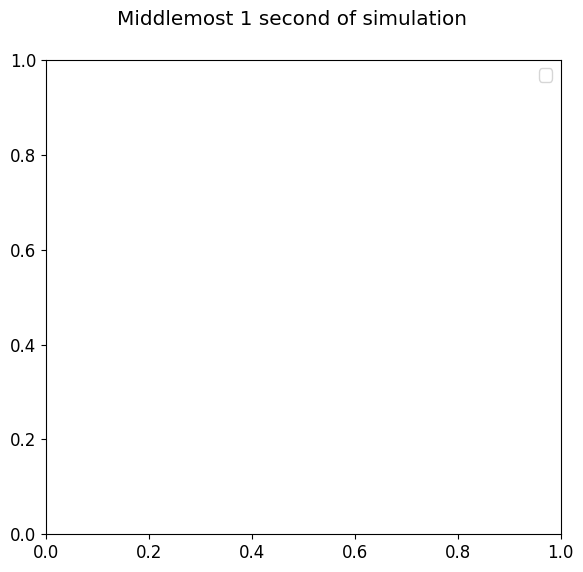

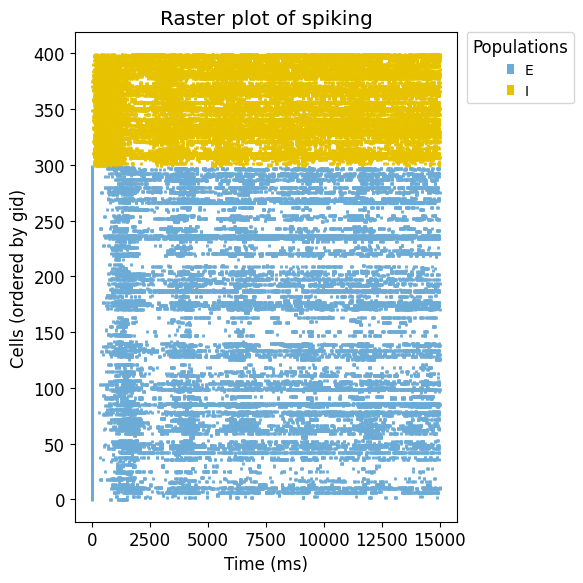

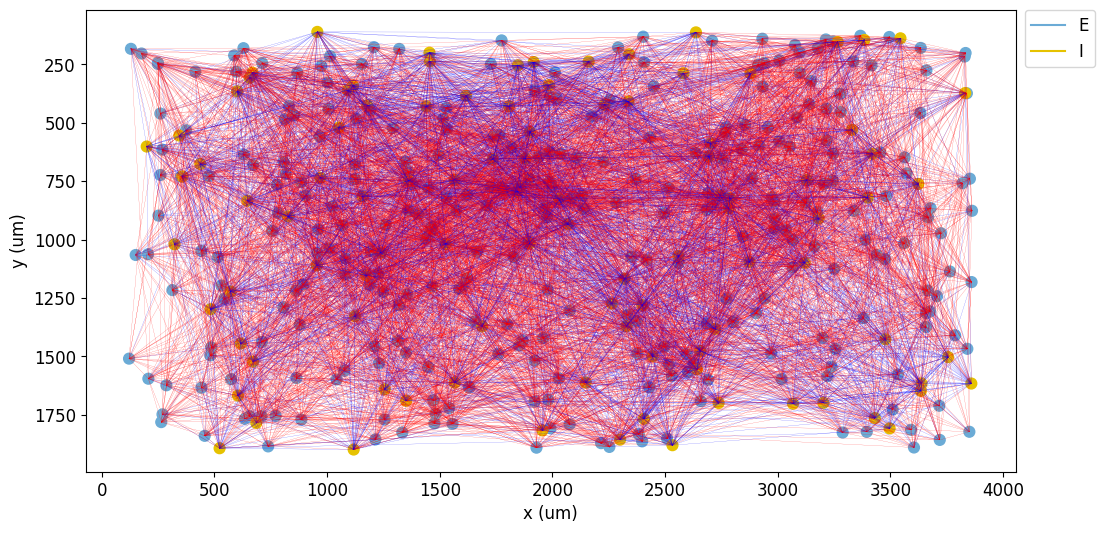

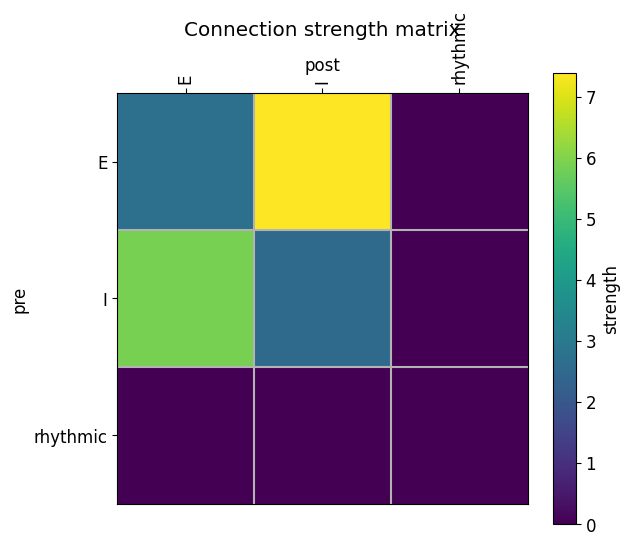

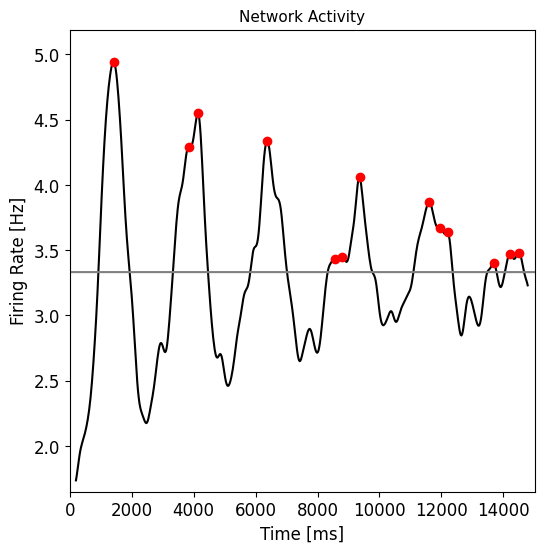

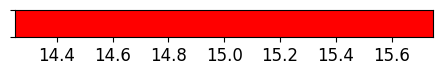

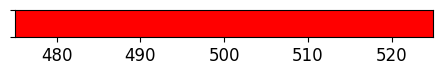

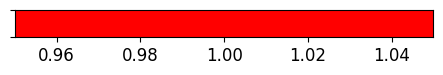

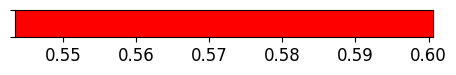

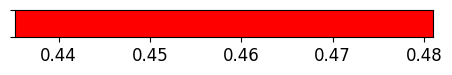

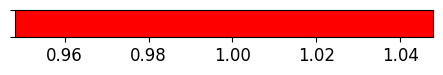

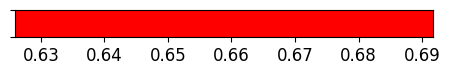

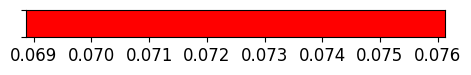

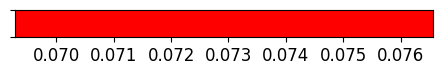

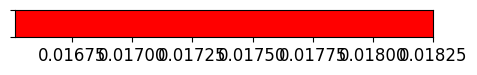

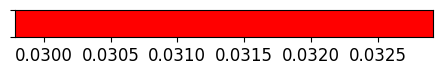

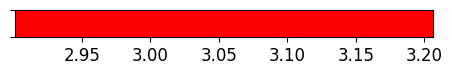

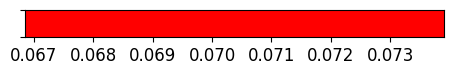

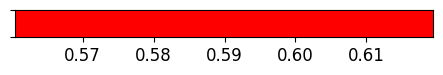

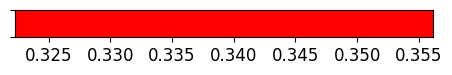

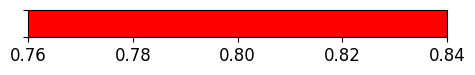

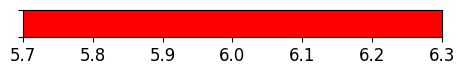

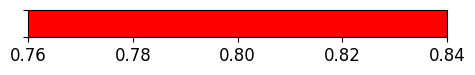

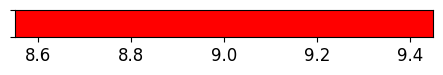

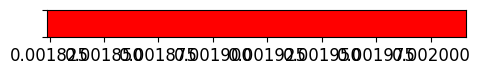

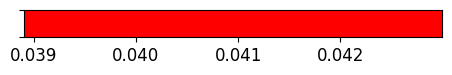

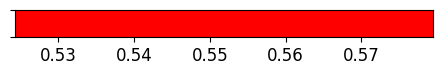

In [10]:
import json
import shutil
import os
from batch_run_files.aw_batch_tools import generate_all_figures
exclude_running = False
output_only = True
fresh_figs = True
for root, dirs, files in os.walk('/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5_optimizing'):
    for file in files:
        if file.endswith('_Fitness.json'):
            if '.archive' in root:
                continue
            if exclude_running and 'output/' in root: continue
            if output_only and 'output/' not in root: continue
            specific_output = root.split('optimizing/')[1].split('/gen_')[0]
            try:
                fitness = json.load(open(os.path.join(root, file)))
                overall_fitness = fitness['fitness']
            except:
                print(f'Error reading {file}')
            
            if overall_fitness < 350:
                print(f'Overall fitness for {file} is {overall_fitness}')
                print(f'Generating plots for {file}')
                #move_plots_to_plots_folder(root)
                #generate_pdf_reports(root, params)
                #print('Plots and pdf reports generated
            #print(fitness)
                batchdata_path = os.path.join(root, file.replace('_Fitness.json', '_data.json'))
                assert os.path.exists(batchdata_path), f'{batchdata_path} does not exist'
                try:
                    simLabel = batchdata_path.split('/')[-1].replace('_data.json', '')
                    run_path = os.path.dirname(os.path.dirname(batchdata_path))
                    run_basename = os.path.basename(run_path)
                    print(f'Generating plots for Candidate: {simLabel}, Run: {run_basename}')

                    # fresh_figs = False
                    assert os.path.exists(batchdata_path), f'{batchdata_path} does not exist'
                    cfg_path = batchdata_path.replace('_data.json', '_cfg.json')
                    assert os.path.exists(cfg_path), f'{cfg_path} does not exist'
                    fitness_path = batchdata_path.replace('_data.json', '_Fitness.json')
                    assert os.path.exists(fitness_path), f'{fitness_path} does not exist'

                    generate_all_figures(
                        fresh_figs = fresh_figs,
                        net_activity_params = {'binSize': .03*750, 
                                            'gaussianSigma': .12*750, 
                                            'thresholdBurst': 1.0},
                        batchLabel = 'batchRun_evol',
                        #batchLabel = params['filename'][0],
                        #minimum peak distance = 0.5 seconds
                        batch_path = batchdata_path
                    )

                    output_path = batchdata_path
                    output_path = os.path.dirname(output_path)
                    output_path = f'{output_path}/NetworkBurst_and_Raster_Figs/'
                    run_grand_path = os.path.dirname(run_path)
                    plot_row_path = f'{run_grand_path}/goodFit_plots_rows/'
                    if not os.path.exists(plot_row_path+specific_output):
                        os.makedirs(plot_row_path+specific_output)
                    ## shutil copy any files in output_path with the string 'row' in the name to plot path
                    for rooti, dirsi, filesi in os.walk(output_path):
                        if '.archive' in rooti: continue
                        
                        for filei in filesi:
                            if 'row' in filei:
                                if os.path.exists(plot_row_path+filei):
                                    if fresh_figs: os.remove(plot_row_path+specific_output+'/'+filei)
                                    else: continue
                                shutil.copy(rooti+'/'+filei, plot_row_path+specific_output+'/'+filei)
                except:
                    print(f'Error generating plots for {file}')
                    continue